In [504]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

In [505]:
train = pd.read_csv('gcTrianingSet.csv')
test = pd.read_csv('gcPredictionFile.csv')

In [506]:
train.head(30)

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
0,4.249634,2.999878,token_1,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.371230,4.409714,2.839798
1,4.409720,2.839792,token_2,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.220883,4.482361,2.767151
2,4.482361,2.767151,token_3,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.141776,4.542626,2.706886
3,4.542626,2.706886,token_4,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.156459,4.616293,2.633218
4,4.616296,2.633216,token_5,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.285218,4.787172,2.462339
5,4.787174,2.462337,token_6,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.170063,4.902623,2.346889
6,4.902623,2.346889,token_7,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.164785,4.977153,2.272359
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428
8,4.171586,3.077926,token_9,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.457611,4.520573,2.728938
9,4.523625,2.725887,token_10,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.182251,4.621179,2.628333


In [507]:
test.head()

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun
0,4.247186,2.774299,token_11,0.408436,NaN
1,NaN,NaN,token_76,0.124429,NaN
2,NaN,NaN,token_53,0.245838,NaN
3,NaN,NaN,token_88,0.169346,NaN
4,NaN,NaN,token_70,0.296311,NaN


In [508]:
train.shape , test.shape

((2730, 13), (1625, 5))

In [509]:
train.describe()

,initialUsedMemory,initialFreeMemory,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,5.775503,1.921919,0.415684,0.291495,0.479192,0.018359,0.000535,0.002755,0.186569,5.775588,1.921990
std,0.801402,0.726219,1.619302,1.132280,1.855206,0.111837,0.007700,0.016707,0.128994,0.802645,0.728086
min,4.129662,0.330214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001052,4.117682,0.330214
25%,5.143413,1.338731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112348,5.137244,1.337994
50%,5.758096,1.961032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141588,5.758960,1.959821
75%,6.418293,2.484630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230622,6.419282,2.484630
max,7.520346,3.728506,7.583425,5.281528,8.037598,2.410000,0.260000,0.350000,0.906536,7.520346,3.749075


In [510]:
l =[]
for index,row in train.iterrows():
    a = row['initialUsedMemory']+row['initialFreeMemory']
    l.append(a)
train['initialTotalMemory'] = l

In [511]:
train['initialTotalMemory']

0       7.249512
1       7.249512
2       7.249512
3       7.249512
4       7.249512
5       7.249512
6       7.249512
7       7.249512
8       7.249512
9       7.249512
10      7.249512
11      7.249512
12      7.249512
13      7.249512
14      7.249512
15      7.249512
16      7.249512
17      7.249512
18      7.249512
19      7.249512
20      7.249512
21      7.249512
22      7.249512
23      7.249512
24      7.249512
25      7.249512
26      7.249512
27      7.249512
28      7.249512
29      7.249512
          ...   
2700    7.606934
2701    7.606934
2702    7.606934
2703    7.606934
2704    7.606934
2705    7.606934
2706    7.606934
2707    7.606934
2708    7.606934
2709    7.606934
2710    7.606934
2711    7.606934
2712    7.606934
2713    7.606934
2714    7.606934
2715    7.606934
2716    7.694824
2717    7.694824
2718    7.694824
2719    7.694824
2720    7.694824
2721    7.694824
2722    7.694824
2723    7.694824
2724    7.694824
2725    7.694824
2726    7.694824
2727    7.6948

In [512]:
l =[]
for index,row in train.iterrows():
    a = row['finalUsedMemory']+row['finalFreeMemory']
    l.append(a)
train['finalTotalMemory'] = l

In [513]:
train['finalTotalMemory'].max()

8.037597657000001

In [514]:
l =[]
for index,row in train.iterrows():
    a = row['finalTotalMemory']-row['initialTotalMemory']
    l.append(float("{0:.6f}".format(a)))
train['changeInMemory'] = l

In [515]:
# train.drop(['chnageInMemory'],axis =1 ,inplace=True)

In [516]:
train['changeInMemory'].value_counts()

-0.000000    2572
 0.006348       4
 0.018066       3
 0.011719       3
 0.025879       3
-0.001953       2
-0.004883       2
 0.021973       2
 0.016113       2
 0.003906       2
 0.006836       2
 0.056641       2
 0.043945       2
 0.027832       2
 0.045898       2
 0.028809       2
 0.004395       2
 0.030273       2
 0.025391       2
 0.029297       2
-0.025391       2
 0.043457       2
 0.010254       2
 0.048828       2
 0.018555       2
 0.036621       2
 0.009766       1
-0.039551       1
-0.214844       1
 0.003418       1
             ... 
-0.058594       1
-0.072266       1
 0.028320       1
 0.041992       1
-0.001465       1
 0.024414       1
 0.000488       1
 0.145020       1
 0.275879       1
-0.012695       1
 0.069336       1
-0.045410       1
 0.096680       1
-0.299316       1
-0.007324       1
 0.007812       1
-0.198242       1
-0.040039       1
-0.010254       1
 0.011230       1
 0.085449       1
 0.277832       1
-0.284668       1
-0.224121       1
 0.254883 

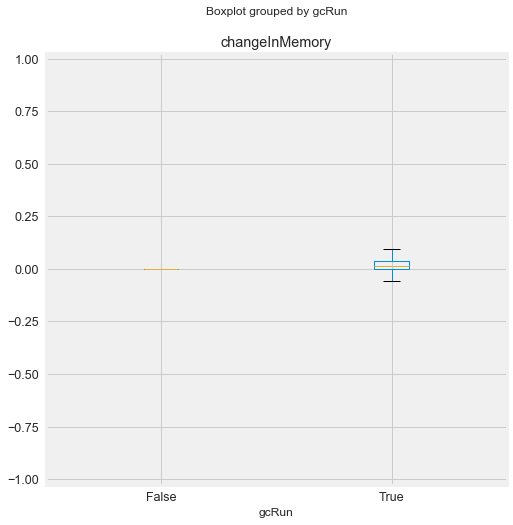

In [517]:
train.boxplot(column="changeInMemory",by= "gcRun",figsize= (8,8))
plt.show()

In [518]:
l =[]
for index,row in train.iterrows():
    token = row['query token']
    l.append(int(filter(str.isdigit, token)))
train['token'] = l

In [519]:
dic = {True:1 ,
      False :0}

In [520]:

train['gcRun'] = train['gcRun'].map(dic).astype(int)

In [521]:
train['changeInMemory'].max()

0.93408199999999997

In [522]:
l =[]
l1 = []
for index,row in train.iterrows():
    a = abs(row['finalUsedMemory']-row['initialUsedMemory'])
    b = math.floor(abs(row['finalUsedMemory']-row['initialUsedMemory']))
    l.append(float("{0:.6f}".format(a)))
    l1.append(float("{0:.6f}".format(b)))
train['UsedMemory'] = l
train['UsedMemoryCat'] = l1

In [523]:
train['UsedMemory'].max()

2.5750069999999998

In [524]:
train.drop(['initialTotalMemory','finalTotalMemory','query token'],axis=1,inplace=True)

In [101]:
train = train.sort_values(['token','UsedMemory'])

In [104]:
train.to_csv('data.csv')

In [525]:
train.head()

,initialUsedMemory,initialFreeMemory,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,changeInMemory,token,UsedMemory,UsedMemoryCat
0,4.249634,2.999878,0,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798,-0.0,1,0.160080,0.0
1,4.409720,2.839792,0,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151,-0.0,2,0.072641,0.0
2,4.482361,2.767151,0,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886,0.0,3,0.060265,0.0
3,4.542626,2.706886,0,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218,-0.0,4,0.073668,0.0
4,4.616296,2.633216,0,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339,0.0,5,0.170877,0.0


In [106]:
train.shape

(2730, 15)

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda2\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


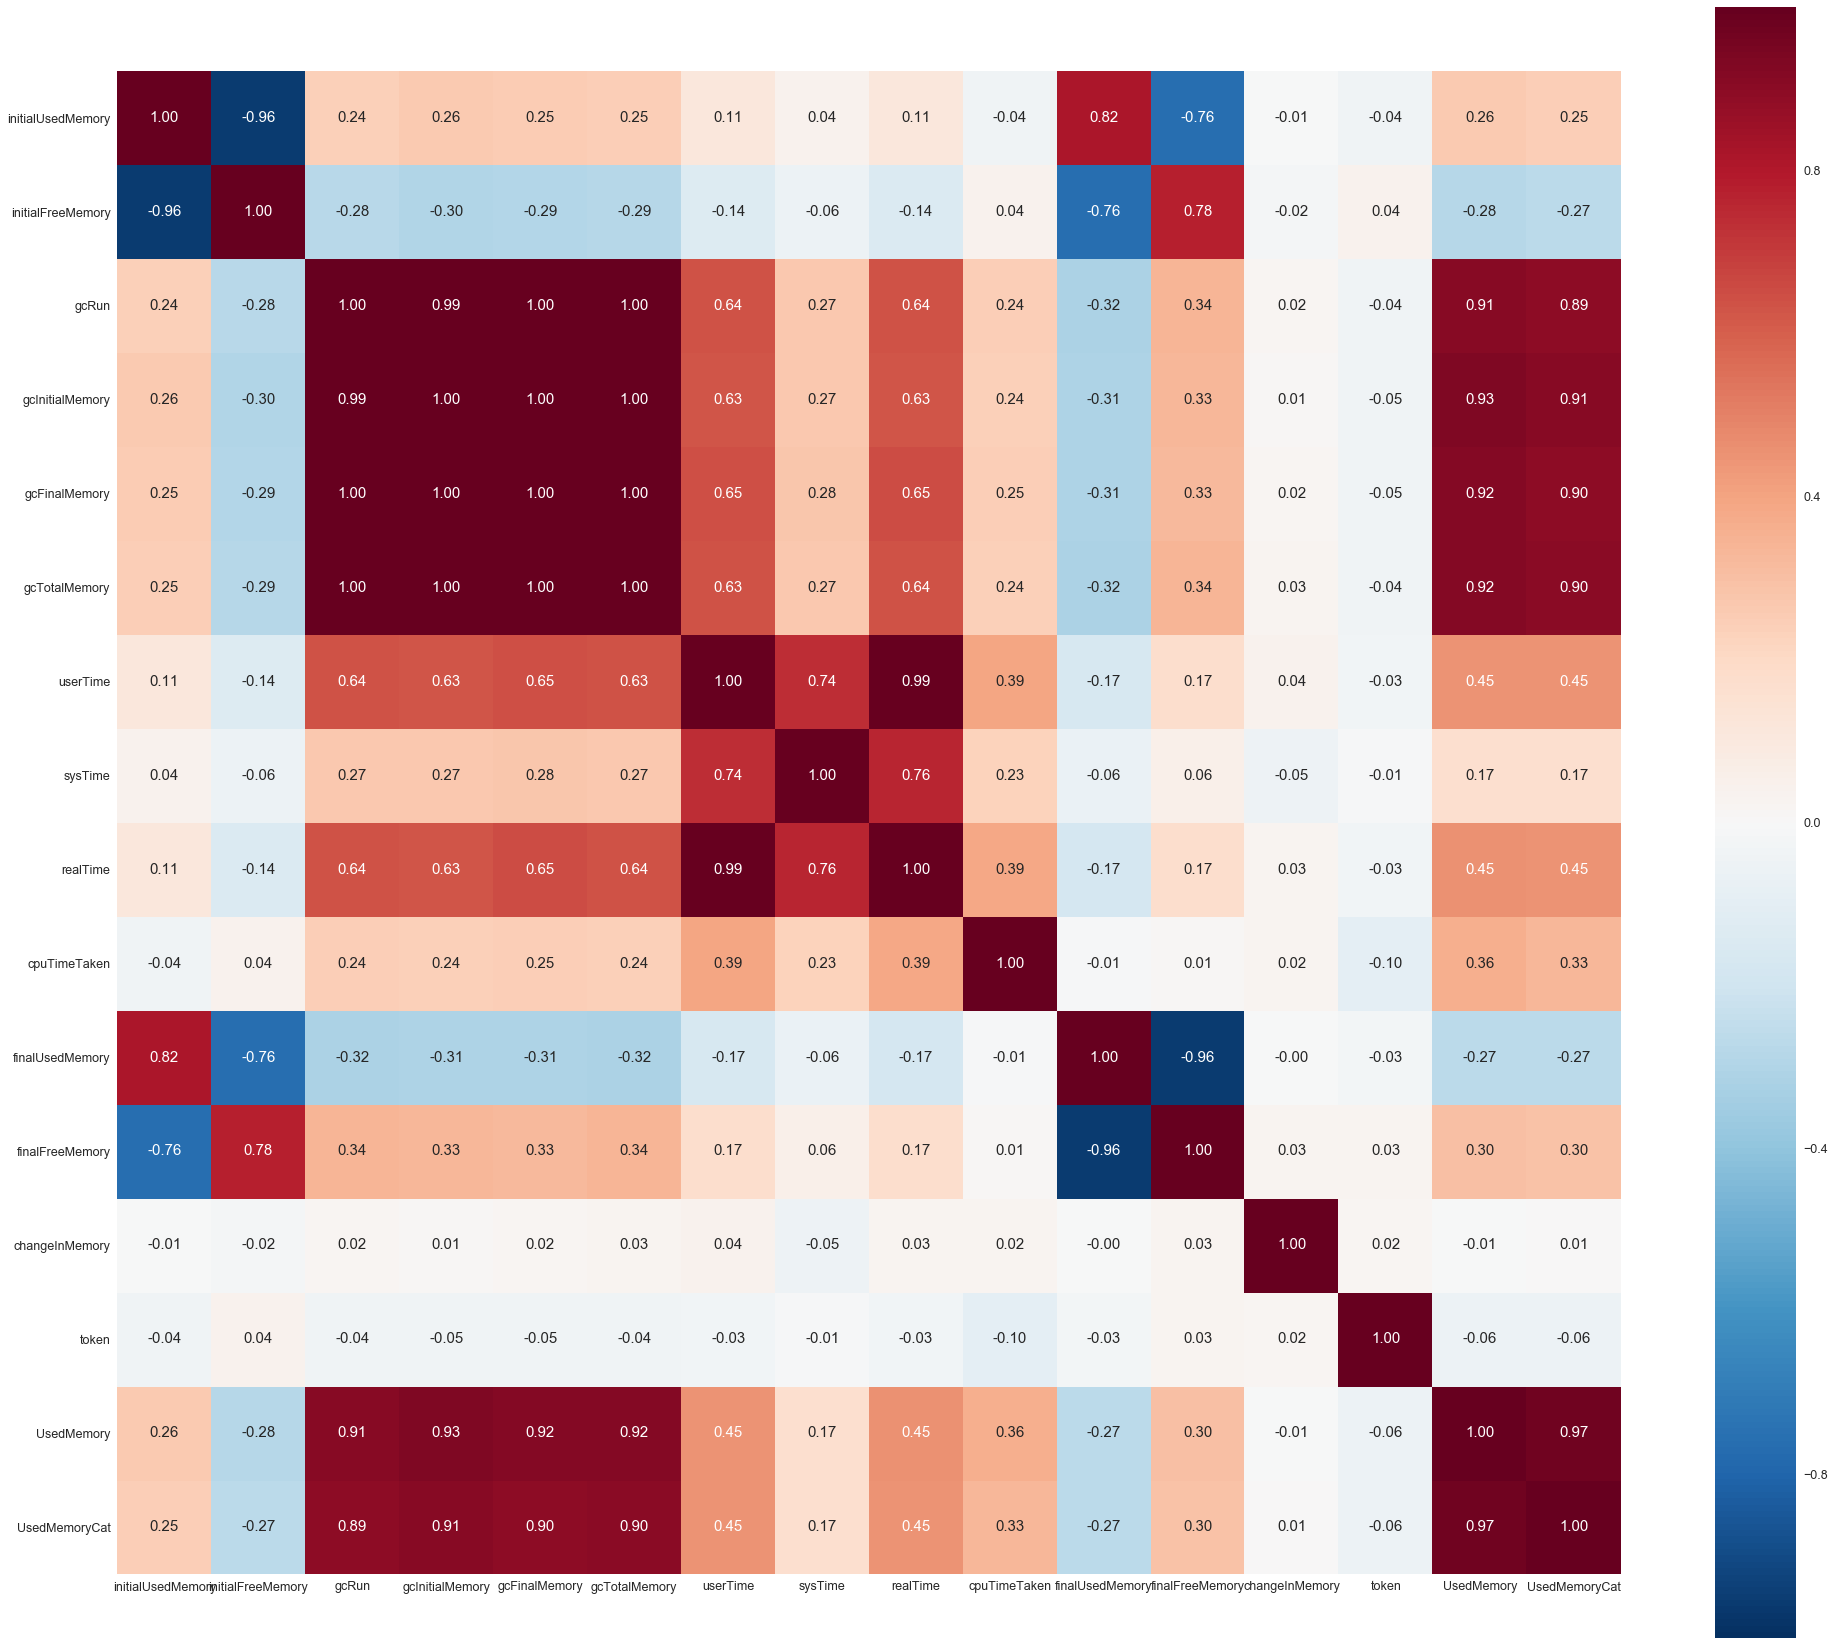

In [110]:
cm = np.corrcoef(train.values.T)
sns.set(font_scale=1.25)
a4_dims = (30,30)
fig ,ax = plt.subplots(figsize=a4_dims)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',ax =ax, yticklabels=train.columns.values, xticklabels=train.columns.values)
plt.show()

In [526]:
l =[]
for index,row in test.iterrows():
    token = row['query token']
    l.append(int(filter(str.isdigit, token)))
test['token'] = l

In [527]:
test.drop(['query token','gcRun'],axis=1,inplace=True)

In [531]:
X1 = train[['cpuTimeTaken','token']]
y1 = train['UsedMemoryCat']

In [532]:
scale= StandardScaler()
X1 = scale.fit_transform(X1)

In [533]:
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)

In [123]:
# pca = PCA(n_components=10)
# fit =pca.fit(X)  


In [124]:
# fit.components_

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=.1, random_state=42)

In [126]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,token
0,4.247186,2.774299,0.408436,11
1,NaN,NaN,0.124429,76
2,NaN,NaN,0.245838,53
3,NaN,NaN,0.169346,88
4,NaN,NaN,0.296311,70


In [493]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

dtrain = xgb.DMatrix(X1, label=y1)
dtest = xgb.DMatrix(scale.fit_transform(test[['cpuTimeTaken','token']]))

In [528]:
train['UsedMemoryCat'].value_counts()

0.0    2583
1.0      77
2.0      70
Name: UsedMemoryCat, dtype: int64

In [529]:
l = []
for index,row in train.iterrows():
    if row['UsedMemoryCat']>0:
        l.append(1)
    else:
        l.append(0)
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [530]:
train['UsedMemoryCat']=l

In [497]:
# params2 = {
#     # Parameters that we are going to tune.
#     'max_depth':6,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'multi:softprob',
#     'num_class':2
# }

# n_rounds = 15

parameters = { #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,.5,.1,.3], #so called `eta` value
              'max_depth': [3,5,6],
              'min_child_weight': [1],
              'silent': [0],
              'subsample': [0.8,.9],
              'colsample_bytree': [0.7,.8],
              'n_estimators': [5,10,20], #number of trees, change it to 1000 for better results
              'seed': [1337]}

In [498]:
xgb_model = xgb.XGBClassifier()

In [499]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(y1, n_folds=5, shuffle=True), 
                   scoring='accuracy',
                   verbose=2, refit=True)


In [250]:
clf.fit(X1,y1)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   17.4s finished
C:\ProgramData\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20], 'subsample': [0.8, 0.9], 'seed': [1337], 'colsample_bytree': [0.7, 0.8], 'silent': [0], 'objective': ['binary:logistic'], 'learning_rate': [0.05, 0.5, 0.1, 0.3], 'max_depth': [3, 5, 6], 'min_child_weight': [1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [251]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

('Raw AUC score:', 0.9465201465201465)
colsample_bytree: 0.7
learning_rate: 0.5
max_depth: 3
min_child_weight: 1
n_estimators: 20
objective: 'binary:logistic'
seed: 1337
silent: 0
subsample: 0.9


In [534]:
# para ={
#     'colsample_bytree': 0.7,
#     'learning_rate': 0.05,
#     'max_depth': 3,
#     'min_child_weight': 1,
#     'n_estimators': 5,
#     'n_jobs': -1,
#     'objective': 'binary:logistic',
#     'seed': 1337,
#     'silent': 0,
#     'subsample': 0.8
#     }

para ={
    'colsample_bytree': 0.7,
    'learning_rate': 0.5,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 20,
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'seed': 1337,
    'silent': 0,
    'subsample': 0.9,
    }



In [535]:
n_rounds=15

In [536]:
bst = xgb.train(para, dtrain,n_rounds)

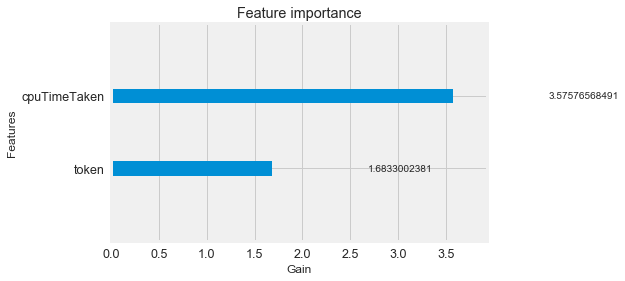

In [537]:
 xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

In [539]:
dtest.feature_names = dtrain.feature_names

In [565]:
pred = (bst.predict(dtest) > .2).astype('int')

In [566]:
collections.Counter(pred)

Counter({0: 1283, 1: 342})

In [567]:
pred

array([1, 0, 1, ..., 0, 0, 1])

In [568]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,token,gcRun
0,5.687221,2.000711,0.408436,11,1
1,5.651283,1.860398,0.124429,76,0
2,5.651283,1.867768,0.245838,53,1
3,5.651283,2.113250,0.169346,88,0
4,5.651283,1.813677,0.296311,70,1


In [569]:
test['gcRun'] = pred

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


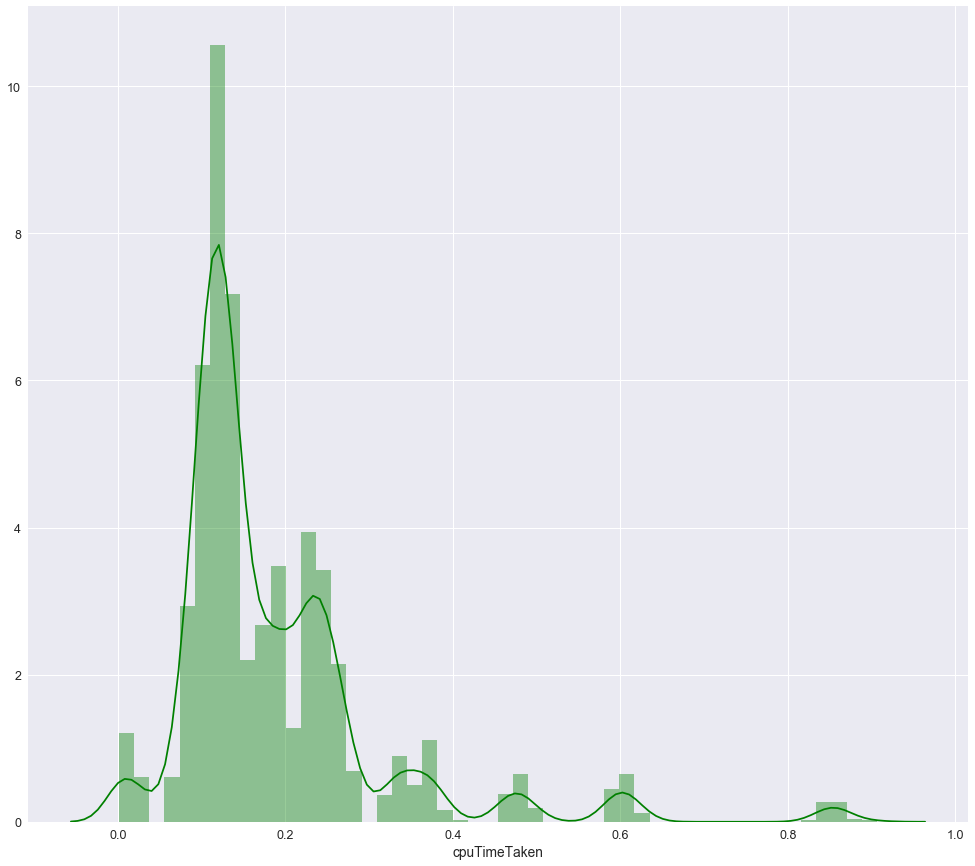

In [455]:

plt.figure(figsize=(15, 15))
sns.distplot(train['cpuTimeTaken'], color='g', bins=50, hist_kws={'alpha': 0.4})
plt.show()

In [456]:
features_req = ['initialFreeMemory','cpuTimeTaken' ,'token','gcRun']

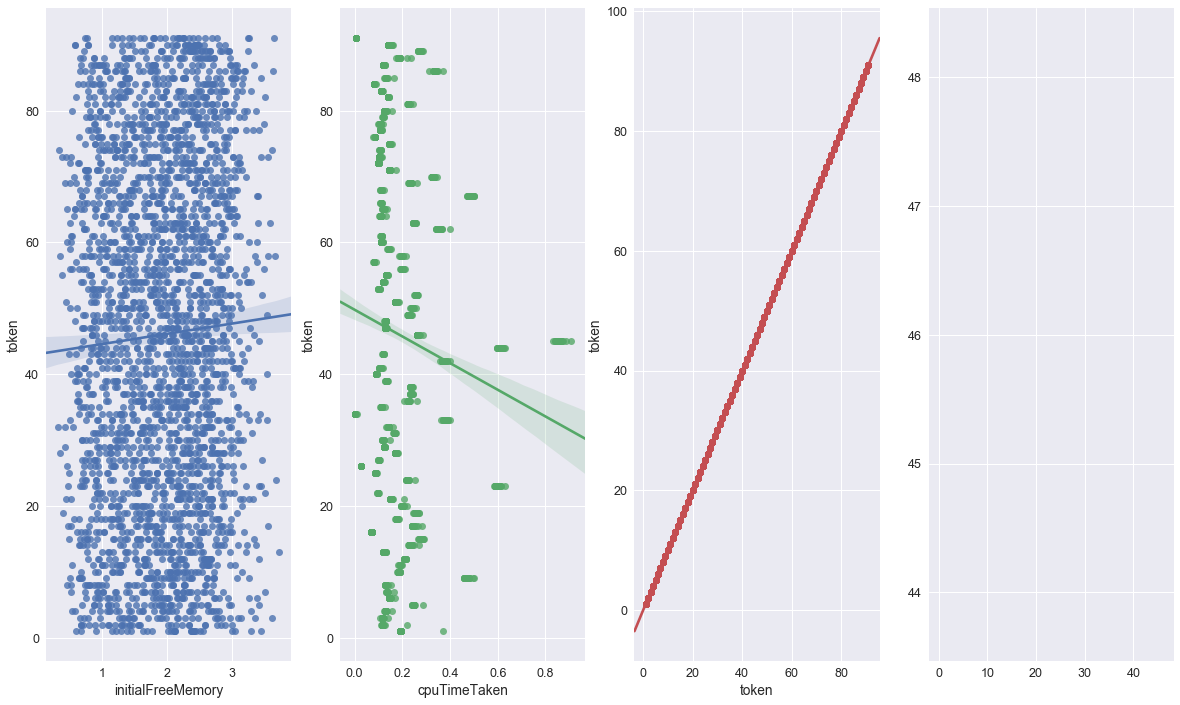

In [457]:
fig, ax = plt.subplots(int(round(len(features_req) / 3)), 4, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_req) - 1:
        sns.regplot(x=features_req[i],y='token', data=train[features_req], ax=ax)

In [458]:
X2 = scale.fit_transform(X2)
y2 = label_encoder.fit_transform(y2)

In [459]:
dtrain = xgb.DMatrix(X2, label=y2)
dtest = xgb.DMatrix(scale.fit_transform(test[['cpuTimeTaken','token','gcRun']]))

In [460]:
parameters = {
              'learning_rate': [0.05,.5,.1,.3], #so called `eta` value
              'max_depth': [3,4,5,6,15,30],
              'min_child_weight': [1],
              'silent': [0],
              'subsample': [0.8,.9,1],
              'colsample_bytree': [0.7,.8,.9,1],
              'n_estimators': [5,20,50,100,200], #number of trees, change it to 1000 for better results
              'seed': [1337]}

In [52]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, cv =2 , 
                   scoring='accuracy',
                   verbose=2, refit=True)


In [53]:
clf.fit(X2,y2)

ValueError: All the n_labels for individual classes are less than 3 folds.

In [ ]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [668]:
X2 = train[['cpuTimeTaken','token','gcRun']]
y2 = train['initialUsedMemory']

In [669]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_jobs=-1 , oob_score=True , n_estimators=10 , random_state=42 ,max_depth=100)

In [670]:
clf_svm = svm.SVR(kernel='sigmoid')

In [671]:
reg.fit(X2,y2)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [672]:
pred2 = reg.predict(test[['cpuTimeTaken','token','gcRun']])

In [673]:
ifm = pred2.tolist()

In [674]:
pred2

array([ 6.78362443,  5.53332101,  6.69340564, ...,  5.61817723,
        5.47583705,  6.28824033])

In [675]:
ifm

[6.7836244322,
 5.5333210066,
 6.693405638100001,
 6.388619803799999,
 6.1043342731,
 5.1077807515,
 5.856750036799999,
 6.062730694,
 5.84995202455,
 6.4498648108999985,
 6.4686981566,
 5.980548282700001,
 5.4262098474,
 5.6198771188,
 6.6616404581,
 5.654021229500001,
 6.347018939900001,
 5.567911742600001,
 5.067844125600001,
 6.240848991600001,
 5.584916571799999,
 5.724411603100001,
 5.2548981109,
 5.3331656334,
 6.001833311500001,
 4.7975674621,
 5.7953201188,
 6.0415854951,
 5.137416456,
 5.758740960099999,
 4.6401367893000005,
 7.079259329600001,
 5.7959541558000005,
 6.092888071499999,
 5.3400680254,
 5.5369050729,
 5.656957255799999,
 5.037190119,
 6.2104824083,
 5.822253930699999,
 4.876386782300001,
 5.505293833599999,
 5.9661951385,
 5.771219540399999,
 5.3741194605,
 5.6816787347,
 5.987586249599999,
 5.2110156349,
 5.721685117199999,
 5.0567212246,
 5.754073984899999,
 5.665660108,
 5.550089030800001,
 6.1236014336,
 5.293364421100001,
 5.6503827826999995,
 6.00303803690

In [676]:
collections.Counter(pred2)

Counter({5.7079734937999991: 1,
         5.4584617923000014: 2,
         5.5706215307000004: 1,
         7.3147945909999992: 1,
         6.1010571202999992: 1,
         5.1944161176999994: 1,
         5.3879853396000001: 2,
         6.2136498653000007: 1,
         6.8431130669000009: 1,
         5.6465665317000004: 1,
         5.0764148628000001: 1,
         6.0440789874000007: 1,
         6.1034929118000001: 1,
         5.343361079000001: 1,
         5.6132908189000004: 1,
         6.3449899697000003: 1,
         5.4941953361000007: 2,
         5.4712774422000008: 1,
         5.7023050784000002: 1,
         5.3793223052999988: 1,
         5.5285208493000004: 1,
         5.4693339291000012: 1,
         6.2570746654000002: 6,
         5.7412932991999996: 1,
         6.0207751937000005: 1,
         6.4346736646: 2,
         4.9345973859000001: 1,
         6.6232341690999998: 1,
         6.5274566788999993: 1,
         4.9669193532999998: 1,
         6.4377960560000007: 1,
         5.0681

In [677]:
test['initialUsedMemory']= pred2.tolist()

In [678]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,token,gcRun
0,6.783624,0.945720,0.408436,11,1
1,5.533321,1.905871,0.124429,76,0
2,6.693406,1.101701,0.245838,53,1
3,6.388620,1.320371,0.169346,88,0
4,6.104334,1.408830,0.296311,70,1


In [679]:
X2 = train[['cpuTimeTaken','token','gcRun','initialUsedMemory']]
y2 = train['initialFreeMemory']

In [680]:
clf_svm = svm.SVR(kernel='sigmoid')

In [681]:
reg = RandomForestRegressor(n_jobs=-1 , oob_score=True , n_estimators=10 , random_state=42 ,max_depth=100)

In [682]:
reg.fit(X2,y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [683]:
pred2 = reg.predict(test[['cpuTimeTaken','token','gcRun','initialUsedMemory']])

In [684]:
test['initialFreeMemory']= pred2.tolist()

In [685]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,token,gcRun
0,6.783624,0.811123,0.408436,11,1
1,5.533321,2.229519,0.124429,76,0
2,6.693406,1.205217,0.245838,53,1
3,6.388620,1.408714,0.169346,88,0
4,6.104334,1.411294,0.296311,70,1


In [619]:
mean_train = np.mean(y1)
mean_train

0.053846153846153849

In [94]:
# Get predictions on the test set
baseline_predictions = np.ones(test['gcRun'].shape) * mean_train
collections.Counter(baseline_predictions)

Counter({0.062637362637362637: 1625})

In [97]:
# Compute MAE
mae_baseline = mean_absolute_error(test['gcRun'], baseline_predictions)
mae_baseline

0.070173457311918847

In [106]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'multi:softprob',
    'num_class':2
}

In [107]:
params['eval_metric'] = "mae"

In [108]:
num_boost_round = 200

In [109]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

XGBoostError: [15:33:57] src/metric/elementwise_metric.cc:27: Check failed: (info.labels.size()) != (0) label set cannot be empty

In [74]:
bst = xgb.train(params2, dtrain, n_rounds)

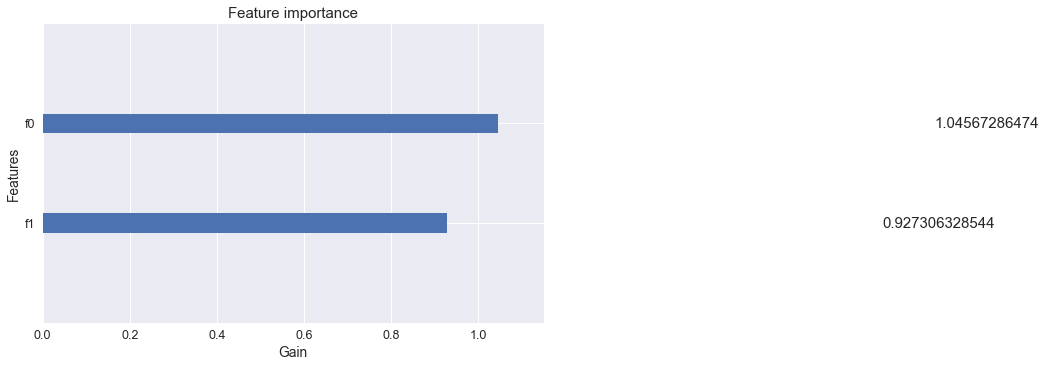

In [75]:
xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

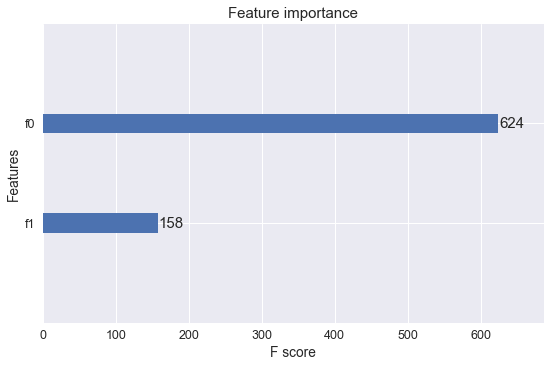

In [76]:
xgb.plot_importance(bst)

In [77]:
pred = (bst.predict(dtest) > .35).astype('int')

In [79]:
pred.

1668

In [81]:
lis = []
lis_ = []
for i in range(1625):
    a = np.argmax(pred[i])
    lis.append(a)
    b = max(pred[i])
    lis_.append(b)

In [84]:
collections.Counter(lis)

Counter({0: 1611, 1: 14})

In [87]:
train['gcRun'].value_counts()

0    2559
1     171
Name: gcRun, dtype: int64

In [88]:
test['gcRun'] = lis

In [90]:
test.head(20)

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun,token
0,4.247186,2.774299,token_11,0.408436,0,11
1,NaN,NaN,token_76,0.124429,0,76
2,NaN,NaN,token_53,0.245838,0,53
3,NaN,NaN,token_88,0.169346,0,88
4,NaN,NaN,token_70,0.296311,0,70
5,NaN,NaN,token_26,0.025018,0,26
6,NaN,NaN,token_4,0.121191,0,4
7,NaN,NaN,token_49,0.220577,0,49
8,NaN,NaN,token_75,0.133468,0,75
9,NaN,NaN,token_31,0.151191,0,31


In [54]:
clf_lr = linear_model.LogisticRegression()
clf_svr = svm.SVR()
clf_xg = 

SyntaxError: invalid syntax (<ipython-input-54-a23ce05cc586>, line 2)

In [49]:
clf_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
clf_svr.score(X_test,y_test)

-0.00100778754836095

In [62]:
test.head()

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun
0,4.247186,2.774299,token_11,0.408436,NaN
1,NaN,NaN,token_76,0.124429,NaN
2,NaN,NaN,token_53,0.245838,NaN
3,NaN,NaN,token_88,0.169346,NaN
4,NaN,NaN,token_70,0.296311,NaN


In [ ]:
gcrun = clf_svm.predict()

In [59]:
test['initialFreeMemory']= pred2.tolist()

In [363]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,token,gcRun
0,5.688428,1.960755,0.408436,11,0
1,5.651283,1.960755,0.124429,76,0
2,5.651283,1.960755,0.245838,53,0
3,5.651283,1.960755,0.169346,88,0
4,5.651283,1.960755,0.296311,70,0


In [686]:
ans=test[['initialFreeMemory','gcRun']]

In [687]:
ans['serialNum'] = range(1,len(ans['gcRun'])+1)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [688]:
ans.to_csv('hound77_14.csv', index=False)